In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = fetch_california_housing()
X, y = data.data, data.target

print("Dataset shape:", X.shape, y.shape)
print("Feature names:", data.feature_names)
print("Target: median house value (in $100k)")


Dataset shape: (20640, 8) (20640,)
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: median house value (in $100k)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set:", X_train.shape)
print("Test set:", X_test.shape)


Train set: (16512, 8)
Test set: (4128, 8)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Before scaling - mean:", X_train[:, 0].mean())
print("After scaling - mean:", X_train_scaled[:, 0].mean())


Before scaling - mean: 3.88075425750969
After scaling - mean: -6.59119615045873e-15


In [4]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained!")
print("Coefficients (w):", model.coef_)
print("Intercept (b):", model.intercept_)


Model trained!
Coefficients (w): [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept (b): 2.071946937378619


In [5]:
y_pred = model.predict(X_test_scaled)

print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", y_test[:5])


First 5 predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
First 5 actual values: [0.477   0.458   5.00001 2.186   2.78   ]


In [6]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


MSE:  0.5559
RMSE: 0.7456
MAE:  0.5332
R²:   0.5758


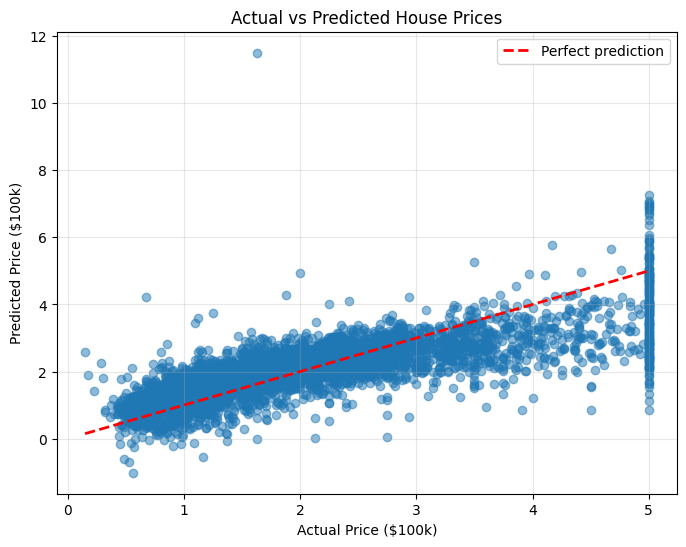

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Price ($100k)')
plt.ylabel('Predicted Price ($100k)')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


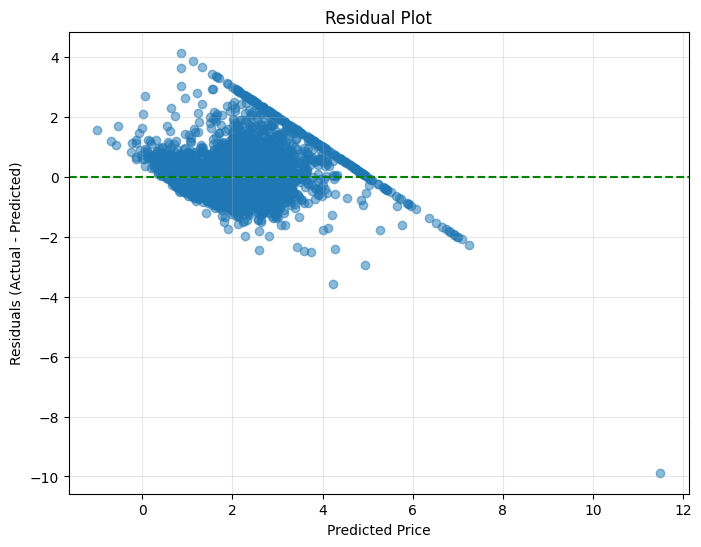

In [9]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.show()
